In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.linear_model import PoissonRegressor, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [43]:
train = pd.read_csv("../data/processed/sepher_model_data/train.csv")
train = train.sample(frac=1,random_state = 12)
train = train[train['FIPS'].astype(str).apply(len)==11] #Remove when data fixed
train.dropna(inplace=True)#Inpute missing is better
X,y = train.drop(['FIPS','EVICTIONS'],axis=1),train['EVICTIONS']
m,n = X.shape

In [45]:
pipe = Pipeline([('scaler', StandardScaler()), ('pr', PoissonRegressor(max_iter=1000))])

In [46]:
pipe = Pipeline([('rf', RandomForestRegressor(n_estimators=200,
                                                n_jobs=-1,
                                                max_features = int(round(n/3)),
                                                random_state = 12,
                                                criterion = 'absolute_error'
                                             )
                 )
                ])



In [47]:
scores = cross_val_score(pipe,X,y,cv=10,scoring='neg_mean_absolute_error')
scores.mean()

-11.977979875055714

In [32]:
scores

{'fit_time': array([0.82744026, 0.79810619, 0.78579426, 0.74035406, 0.77246499,
        0.77070189, 0.76202703, 0.86831903, 0.89976192, 0.90292192]),
 'score_time': array([0.10731387, 0.10626006, 0.10793686, 0.10868406, 0.10874009,
        0.10699797, 0.10767102, 0.10772991, 0.10602593, 0.109308  ]),
 'estimator': [Pipeline(steps=[('rf',
                   RandomForestRegressor(max_features=6, n_jobs=-1,
                                         random_state=12))]),
  Pipeline(steps=[('rf',
                   RandomForestRegressor(max_features=6, n_jobs=-1,
                                         random_state=12))]),
  Pipeline(steps=[('rf',
                   RandomForestRegressor(max_features=6, n_jobs=-1,
                                         random_state=12))]),
  Pipeline(steps=[('rf',
                   RandomForestRegressor(max_features=6, n_jobs=-1,
                                         random_state=12))]),
  Pipeline(steps=[('rf',
                   RandomForestRegressor

<AxesSubplot:>

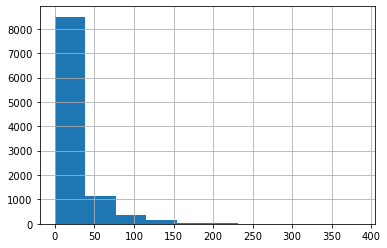

In [82]:
y.hist()

In [6]:
scores

array([-13.49957157, -12.77131335, -13.35903021, -12.02695175,
       -12.88664961, -13.26606481, -11.93976121, -12.42957359,
       -12.84848928, -12.14000975])